# Анализ данных. Базовый уровень

*Матвей Бакшук*, приглашенный преподаватель ФКН по Основам программирования на Python и Анализу данных

## Часть А

###  Задание A1. Визуализация

Для корректного выполнения данного задания необходимо вспомнить разные виды графиков.

<b>NB!</b> Код с построением графиков в этой части просто для примера!

#### Линейный график

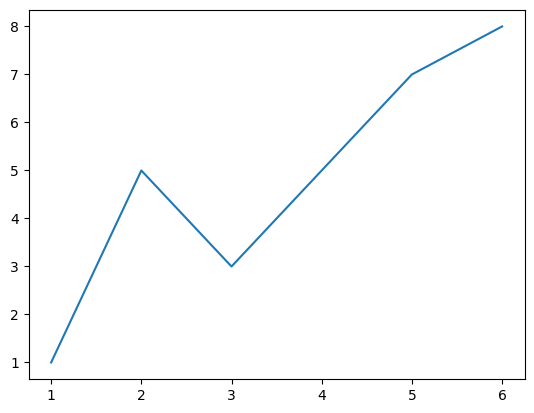

In [131]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6]
y = [1, 5, 3, 5, 7, 8]

plt.plot(x, y)
plt.show()

#### Диаграмма рассеивания

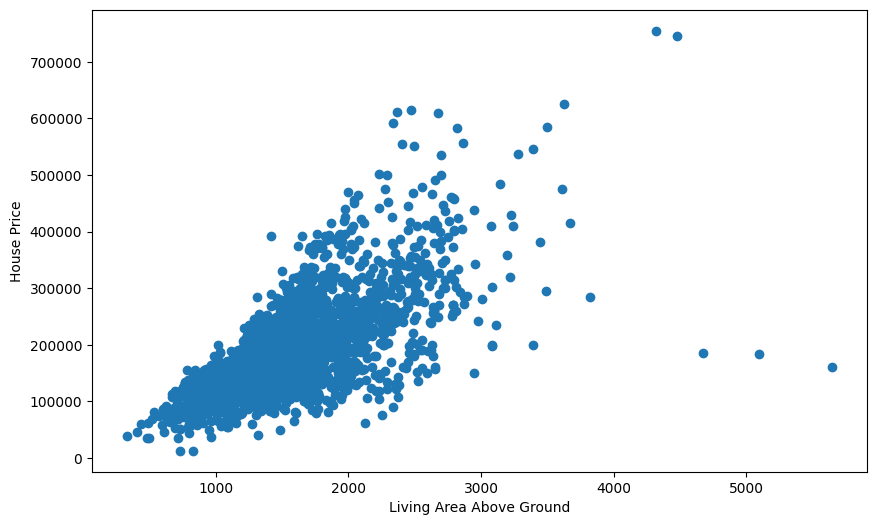

In [132]:
import pandas as pd
df = pd.read_csv('AmesHousing.csv')
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = df['Gr Liv Area'], y = df['SalePrice'])
plt.xlabel("Living Area Above Ground")
plt.ylabel("House Price")
plt.show()

### Ящик с усами (Boxplot)

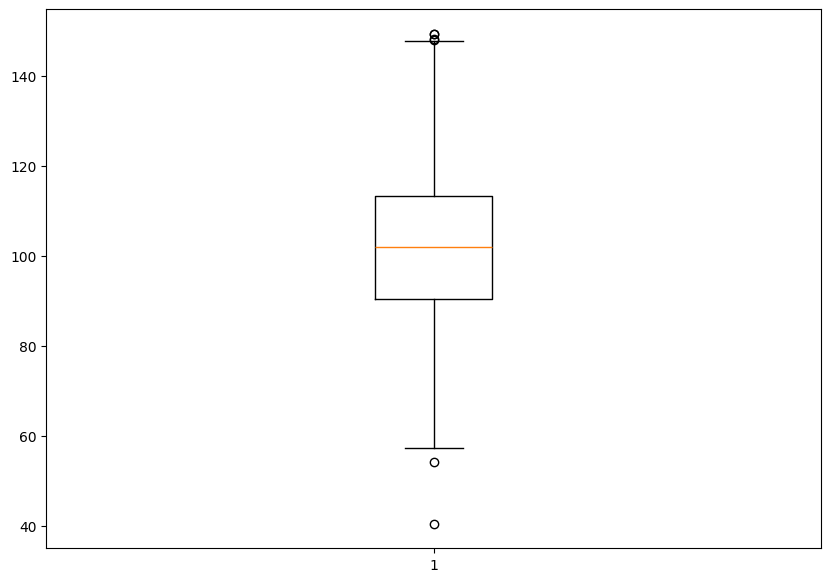

In [133]:
import numpy as np
 
np.random.seed(10)
data = np.random.normal(100, 20, 200)
 
fig = plt.figure(figsize =(10, 7))

plt.boxplot(data)

plt.show()

### Гистограмма

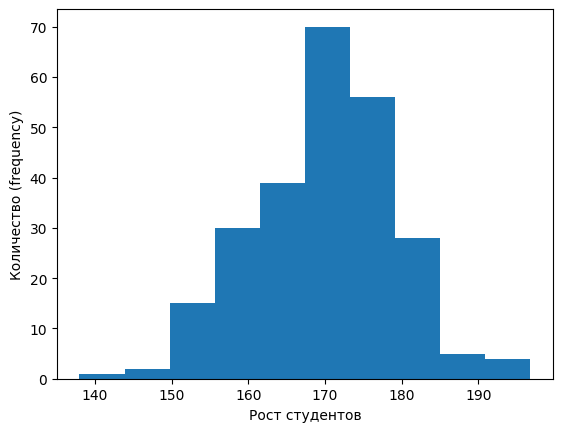

In [134]:
x = np.random.normal(170, 10, 250)

plt.hist(x)
plt.xlabel("Рост студентов")
plt.ylabel("Количество (frequency)")
plt.show() 

### Столбчатая диаграмма (Barplot)

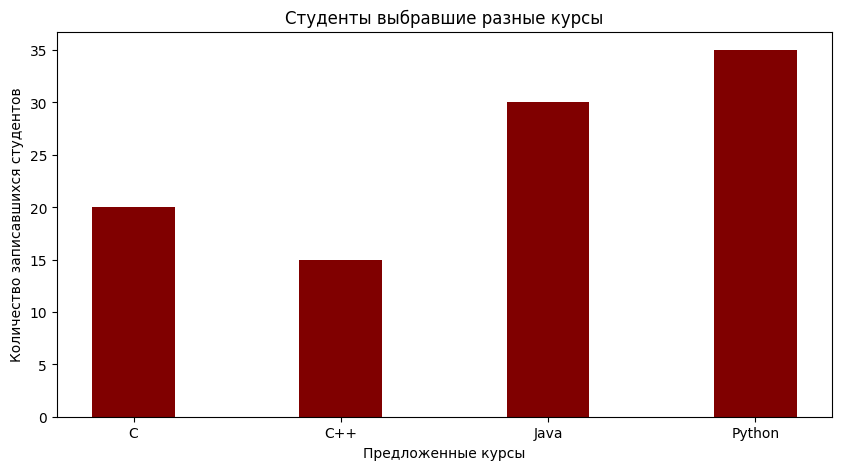

In [135]:
data = {'C':20, 'C++':15, 'Java':30, 
        'Python':35}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Предложенные курсы")
plt.ylabel("Количество записавшихся студентов")
plt.title("Студенты выбравшие разные курсы")
plt.show()

<b> Гистограмма -vs.- Столбчатая диаграмма</b>
    
Отличие гистограмм и столбчатых диаграмм состоит в использовании разных видов шкал в переменных. Гистограммы используются для переменных с непрерывными шкалами (например, год рождения), а столбчатые диаграммы — для дискретных (например, «Франция», «Россия», Великобритания).

### Скрипичный график

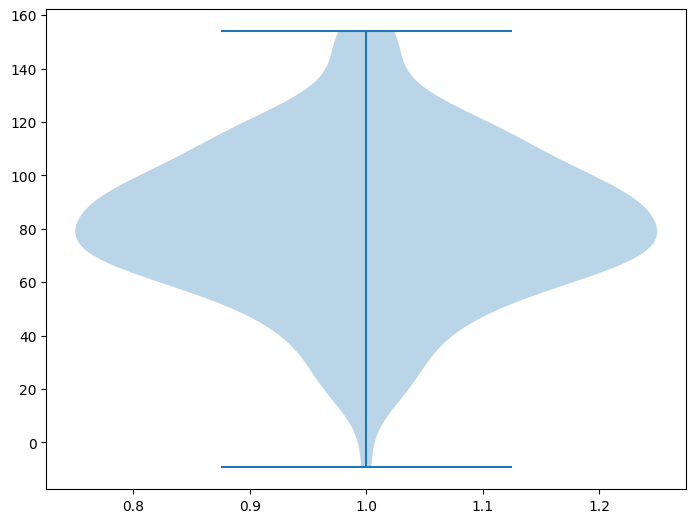

In [136]:
np.random.seed(10)
collectn_1 = np.random.normal(80, 30, 200)


fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(collectn_1)
plt.show()

### Задание A2. Типы переменных, меры центральной тенденции, выбросы

#### Меры центальной тенденции + станд. отклонение

* <b>Среднее значение (mean) </b> – сумма/количество

* <b>Мода </b> - самое частое значение по выборке

* <b> Медиана (median) </b> – значение, находящееся по центру выборки, если отсортировать ее элементы в убывающем или возрастающем порядке (она же *Q2*)

* <b> Стандартное отклонение (std) </b> -  наиболее распространённый показатель рассеивания значений случайной величины относительно её математического ожидания (аналога среднего арифметического с бесконечным числом исходов). 

#### Типы переменных
* <b>Непрерывная</b> – принимает любые значения (и делится на более дробные)
* <b> Дискретная </b> - принимает определенные значения (например, количество студентов в классе)
* <b>Категориальная* </b> – переменная с ограниченным числом уникальных значений или категорий (например, вероисповедание, уровень образования). <i>Делятся на</i>: 
    + <b>Порядковые (ранговые)</b> -  когда ее значения представляют категории с некоторым естественным для них упорядочением, например, уровни удовлетворенности обслуживанием от крайней неудовлетворенности до крайней удовлетворенности (или уровень образования)
    + <b>Номинальные</b> - когда ее значения представляют категории без естественного упорядочения. Примеры номинальных переменных включают регион, почтовый индекс или вероисповедание.
    + <b>Бинарная</b> – принимает только два значения (0 и 1). Пример – статус работы респондента (вопрос опроса, на который ответ "Да" или "Нет")

Разница между <b>ранговой</b> и <b>дискретной</b> (бывают задания без уточнения):

Ранговая – обязательно <i>проранжированные</i> значения (например, "класс квартиры от 1 до 5"). Дискретная – набор значений с каким-то конкретным шагом (например, количество комнат в квартире – 1,2,3,4,5,6...,n)


<b>*</b> является дискретной, но не любая дискретная = категориальная

### Меры центральной тенденции

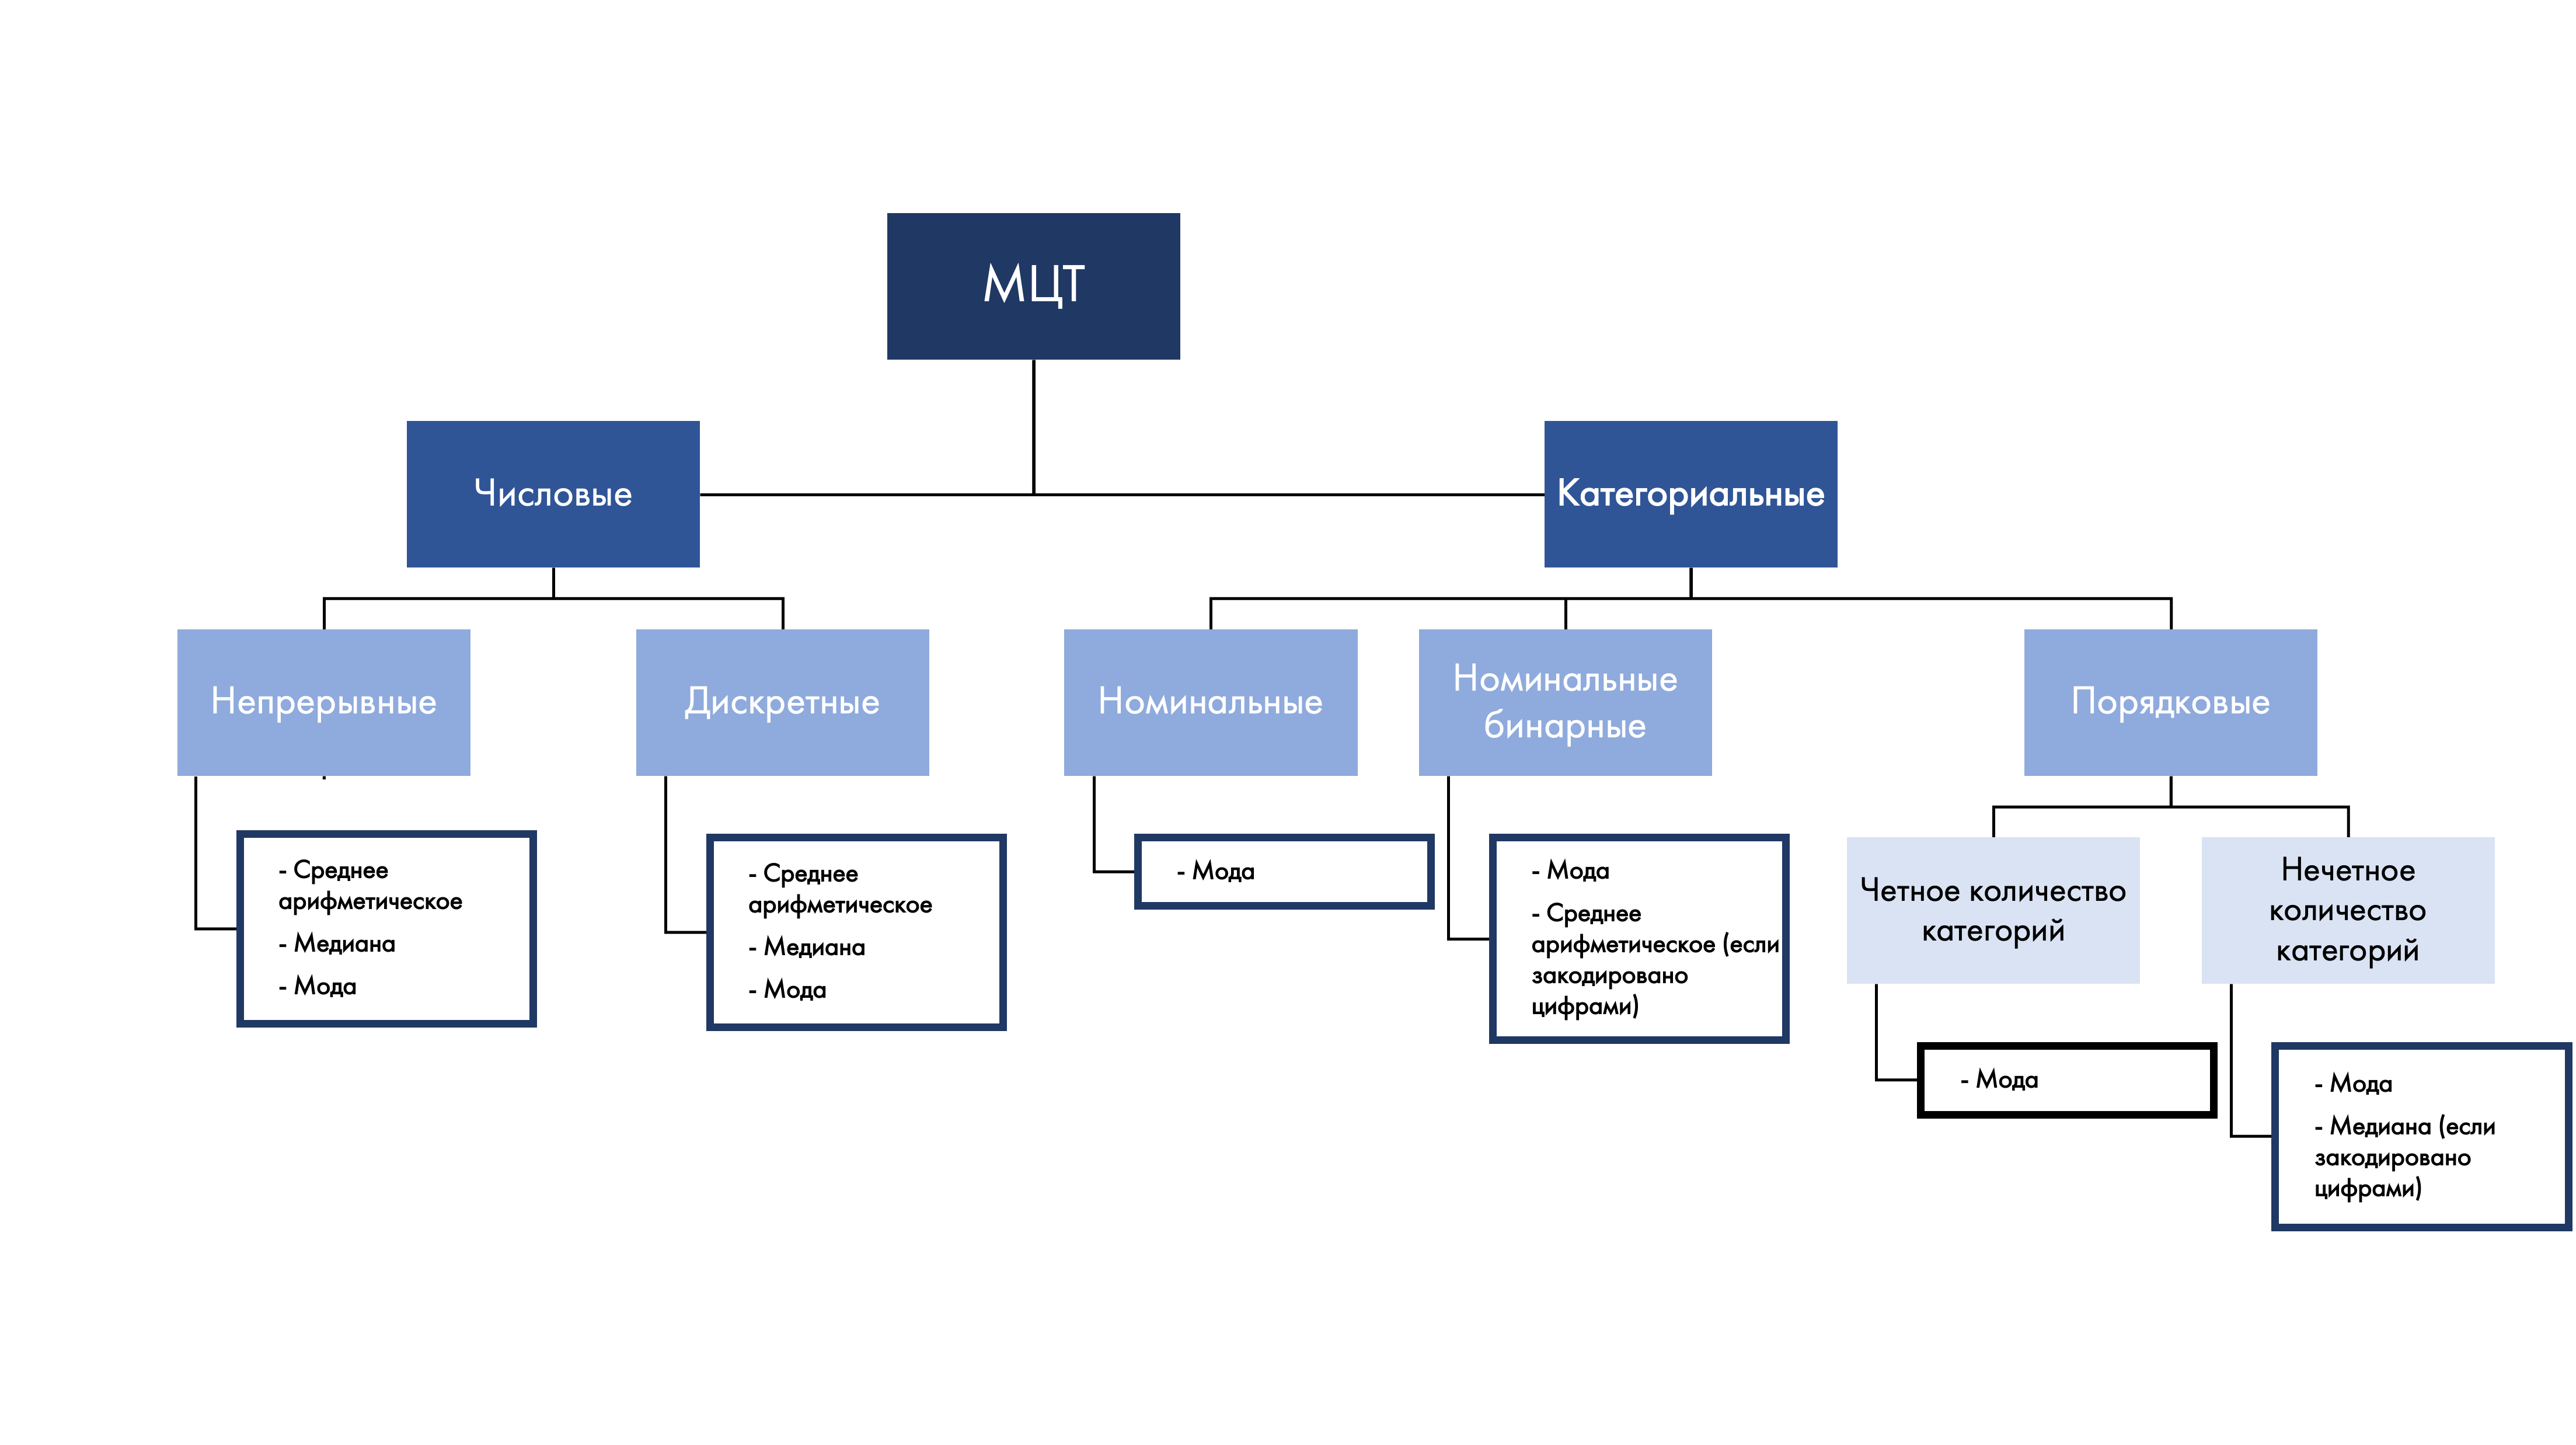

Считаем , `.mean()`, `.median()`, `.mode()`

In [137]:
import pandas as pd
df = pd.DataFrame({"x": [-100,-100,-100,5,5,5,5,6]})

# df.mode()
# df.median()
df.mean()


x   -34.25
dtype: float64

In [138]:
import numpy as np
a = [1,2,3,4]
print(np.median(a))
print(np.mean(a))

2.5
2.5


### Задание А3

Для рассчета вероятности логистической регрессии:

In [139]:
import numpy as np # чтобы посчитать экспоненту

Формула для рассчета вероятности по логистической функции:
$$f(y) = \dfrac{1}{1+exp(-y)},$$

где $y$ - уравнение регрессии, данное в задании. Нужно подставить значения переменных, посчитать y, и вывести значение.

Для примера, возьмем первое задание `A3`

Аналитик Артём решает задачу классификации собак против прочих домашних животных, используя данные по их росту в см (height) и весу в кг (weight). Он оценил логистическую регрессию на обучающей выборке. Оказалось, что уравнение модели задаётся следующим образом:

$$\hat{P}(\mathrm{y_i = dog}) = \sigma(0.01 + 0.3 \times \mathrm{weight}_i + 0.02 \times \mathrm{height}_i).$$
  

Пусть имеется  домашнее животное с <b>ростом 20 см</b> и <b>весом 3 кг</b>. Найдите оценку вероятности принадлежности этого домашнего животного к собакам, которую выдаст модель Артёма. Ответ округлите до сотых.

In [140]:
import numpy as np
y = 0.01+0.3*3+0.02*20
round(1/(1+np.exp(-y)),2)

0.79

In [141]:
y = 0.01+0.3*3+0.02*20
round(1/(1+np.exp(-y)),2) # Сразу округлили до сотых

0.79

Возьмем треть из заданий типа `A3`:

In [142]:
# A3.3
import numpy as np
n_p = 0
n_f = 5
y = (0.9 - 0.1 * n_p + 0.2 * n_f )
round(1/(1+np.exp(-y)),2) 

0.87

### Задание A4. Пропорция выборки в нормальном распределении


<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/350px-Standard_deviation_diagram.svg.png" width="700"/>
</div>

#### Пример точного расчета

In [143]:
from scipy.stats import norm
from scipy.integrate import quad
mean = 65
std = 2
quad(func = lambda x: norm(loc = mean, scale = std).pdf(x), a = 66, b = 68)[0] 
# оценка погрешности нам не нужна

0.24173033745712888

### Задание A5. Оценка репрезентативности выборки

<b>NB!</b> Хорошая выборка должна отражать тенденции генеральной совокупности

Необходимо внимательно смотреть на предлагаемый исследовательский вопрос и отталкиваться от его формулировки.

Чем шире исследовательский вопрос, тем "шире" должна быть выборка. Напрмер, если мы хотим исследовать рынок недвижимости, то хорошо было бы взять цены на продажи квартир за несколько лет по разным городам. Однако, если мы хотим исследовать московский рынок недвижимости за период с 2005 по 2010 год, то наблюдения 

* за другие года
* из других городов

нам не подойдут. Лучше всего будет разобраться на примерах из демонстрационных вариантов

### Задания A6. Корреляция Пирсона

<div>
<img src="https://codecamp.ru/content/images/2021/02/correlation_vs_association1.png" width="700"/>
</div>

Коээфициент корреляции принмает значения от -1 до 1 и отображает <b> линейную связь </b> между переменными. 

Коэффициент корреляции может быть дан в процентах – в таком случае мы можем перевести его в числовой вид разделив на 100.

<b>NB!</b> Корреляция != Каузация. Иными словами, корреляция не позволяет нам делать выводы о причинности и зависимости.

### Задание А7. KNN (K-Nearest Neigbours)

Здесь, мы смотрим на k, и на то, какая метрика расстояния дана (по умолчанию: Евклидова, и вряд ли что-то концептуально изменится). 

![knn.png](knn.png)

### Задание A8. Умение определить переменную по визуализации

Здесь, мы должны логически подумать, какой переменной может соответстовать данный график, предположить ее тип. Стоит посмотреть на задания из вариантов НЭ.

### Задание A9. Меры центральной тенденции на графике

Первое, что легче всего определить - <b>мода</b>. После нее, определяем <b>среднее</b> значение: поскольку оно более чувствительно к "скосам" в данных, это также просто сделать. Наконец, выбираем из переменных <b>медиану </b>.

По умолчанию, распределение даётся скошенное, поэтому все можно определить по такому алгоритму.

### Задание A10. T-test и Z-test

#### T-test

In [144]:
from scipy import stats
help(stats.ttest_rel)

Help on function ttest_rel in module scipy.stats._stats_py:

ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
    Calculate the t-test on TWO RELATED samples of scores, a and b.

    This is a test for the null hypothesis that two related or
    repeated samples have identical average (expected) values.

    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan_policy : {'propagate', 'omit', 'raise'}
        Defines how to handle input NaNs.

        - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
          which the  statistic is computed, the corresponding e

In [145]:
import numpy as np
from scipy import stats

n = 50 # sample size
w = 2.1 # loc [оценка]
std = 0.4 # scale стандартное отклонение

sample = np.random.normal(size = n, loc = w, scale = std)

stats.ttest_1samp(sample, popmean = 0)

TtestResult(statistic=37.29985590769577, pvalue=1.2294273618685785e-37, df=49)

In [146]:
# p_value 0.07, alpha = 0.05, 0.10

In [147]:
help(stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats._stats_py:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
    Calculate the T-test for the mean of ONE group of scores.

    This is a test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.

    Parameters
    ----------
    a : array_like
        Sample observations.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then its length along
        `axis` must equal 1, and it must otherwise be broadcastable with `a`.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan

#### Z-тест (z-критерий Фишера)

Класс методов статистической проверки гипотез (статистических критериев), основанных на нормальном распределении. Обычно применяется для проверки равенства средних значений при известной дисперсии генеральной совокупности

<b>Важно</b>:
Если $$p\text{-value} < \alpha,$$ где $\alpha$ = уровень значимости, то $H_0$ <b>отвергается</b>


Для того, чтобы понять это, можно обратиться к содержательной интерпретации $p\text{-value}$ и вспомнить, что это вероятность получить на имеющихся данных такое распределние, как предполагает нулевая гипотеза $H_0$.


### Задание A11. Ошибка I и II рода

* Ошибка I рода ($\alpha$-ошибка, ложноположительное заключение) — ситуация, когда отвергнута верная нулевая гипотеза (об отсутствии связи между явлениями или искомого эффекта).

* Ошибка II рода ($\beta$-ошибка, ложноотрицательное заключение) — ситуация, когда принята неверная нулевая гипотеза.

Для проверки этой гипотезы Валентин использовал t-test и сделал вывод, что нулевая гипотеза отвергается на уровне значимости 0.05. 

// Вероятность того, что была совершена ошибка 2 рода, более 10%
Вероятность того, что была совершена ошибка 1 рода, менее 10%

### Задание A12. Задачи машинного обучения


* *Классификация* - получение категориального ответа на основе набора признаков. Имеет конечное количество ответов (как правило, в формате «да» или «нет»)

* *Кластеризация* - группировка отдельных наблюдений в кластеры со сходными характеристиками

* *Ранжирование* - выстраивание порядка, присвоение рангов наблюдением

* *Снижение размерности* - преобразование данных, состоящее в уменьшении числа переменных путём получения главных переменных.

* *Регрессия* - метод анализа данных, который предсказывает ценность неизвестных данных с помощью другого связанного и известного значения данных.

### Задача A13. Интерпретация линейной регрессии

<b>Линейная регрессия</b>  — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной  y от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) x  с линейной функцией зависимости.

Иными словами: как одна (зависимая) переменная изменится при увеличени другой (независимой)


Для начала, посмотрим на уравнение линейной регрессии:
$$y_{i} = a+ \beta_{i}x_{i}+\varepsilon_i$$
Разберемся с обозначениями:

* y - зависимая переменная (целевая/target)
* a - константа, свободный член (среднее значение зависимой переменной при прочих равных нулю),
* 𝛽 - вектор коэффициентов (параметров) модели,
* x - вектор независимых переменных (регрессеров),
* i - индекс наблюдения
* 𝜀 - ошибка модели

* <b>Зависимая переменная ("целевая/target")</b> - числовая мера того, что мы пытыемся предсказать, исследовать

Зависимая переменная напрямую связана с исследовательским вопросом, поэтому необходимо внимательно смотреть на предлагаемую формулировку.

* <b> Независимые переменные (регрессоры) </b> –  числовые меры показателей, которые связаны с зависимой переменной. Линейная регрессия позволяет ответить на вопрос, как изменится зависимая переменная в зависимости от увеличения/уменьшения значений независимых переменных. 

#### Интерпретация коэффициентов:

Для примера рассмотрим следующие модели
    
$$y_i = 2.1+3.4x_i+\epsilon_i$$

Мы можем сказать:
* <b>Полный вариант</b>. При увеличении переменной $x_i$ на одну единицу измерения, переменная $y_i$ увеличится на 3.4 при прочих равных.
* <b>Короткий вариант</b>. При увеличении переменной $x_i$, $y_i$ также увеличится.
​
Теперь другой пример:
    
$$y_i = 2.1-3.4x_i+\epsilon_i$$
​
​
Мы можем сказать:
* <b>Полный вариант</b>. При увеличении переменной $x_i$ на одну единицу измерения, переменная $y_i$ уменьшится на 3.4 при прочих равных.
* <b>Короткий вариант</b>. При увеличении переменной $x_i$, $y_i$ уменьшится.
​
Также для обеих моделей <b>верно</b>, что среднее значение зависимой переменной ($y_i$) равно 2.1 при прочих [переменных] равных нулю.

### Задание A14. MSE и MAE

* MSE - среднеквадратичная ошибка

* MAE - средняя абсолютная ошибка


$MSE \downarrow$ $\Rightarrow R^2 \uparrow $


### Задание A15. Интерпретация ROC-кривой

ROC-кривая показывает нам, насколько хорошо предсказывает класс постоенная нами модель

![rere](https://assets-global.website-files.com/6266b596eef18c1931f938f9/64760779d5dc484958a3f917_classification_metrics_017-min.png)

Больше информации про ROC-кривую [здесь](
https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.evidentlyai.com%2Fclassification-metrics%2Fexplain-roc-curve&psig=AOvVaw1V-DDsROG4Cs183e7_kLTU&ust=1712840802240000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCPi8467bt4UDFQAAAAAdAAAAABAE)

## Часть Б

### Задание Б1

К экзамену есть документация библиотек + методические материалы. Можно также запомнить, как при помощи знания функции (даны в метод.материалах) вызвать документацию по ней:

In [148]:
import numpy as np
from scipy import stats

help(stats.norm.interval)

#или же написать функцию, открыть скобки, и нажать shfit+tab+tab

Help on method interval in module scipy.stats._distn_infrastructure:

interval(confidence, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Confidence interval with equal areas around the median.

    Parameters
    ----------
    confidence : array_like of float
        Probability that an rv will be drawn from the returned range.
        Each value should be in the range [0, 1].
    arg1, arg2, ... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        location parameter, Default is 0.
    scale : array_like, optional
        scale parameter, Default is 1.

    Returns
    -------
    a, b : ndarray of float
        end-points of range that contain ``100 * alpha %`` of the rv's
        possible values.

    Notes
    -----
    This is implemented as ``ppf([p_tail, 1-p_tail])``, where
    ``ppf`` is the inverse cumulative distribution funct

$Z$ - оценка (параметр scale) = $\dfrac{\sqrt{Var}}{\sqrt{N}}$ 

In [149]:
stats.norm.interval(confidence  = 0.95, loc = 57, scale = np.sqrt(3.61)/np.sqrt(120))

(56.66005311269374, 57.33994688730626)

Можем округлить в уме, но если нам нужно больше автоматизированности, мы вспоминаем Python:

In [150]:
round(stats.norm.interval(confidence  = 0.95, loc = 57, scale = np.sqrt(3.61)/np.sqrt(120))[1])

57

*Еще вариант:* написать руками.
    
Посмотрим на формулу из методических материалов для рассчета 95% доверительного интервала:

$$\overline{X} - 1.96*\dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X} + 1.96 \dfrac{\sigma}{\sqrt{n}}$$

Тогда правая граница:

In [151]:
round(57+1.96*(3.61**(1/2))/(120**(1/2)))

57

Еще пример:

In [152]:
round(stats.norm.interval(confidence = 0.95, loc = 45, scale = 3/np.sqrt(200))[1])

45

<b>Практика</b>: дорешаем еще две задачи типа Б1.

### Задание Б2. T-test

Вспомнить, что бывает одновыборочный, двувыборочный, и парный критерий Стьюдента.

Данные даны в задании. 

<b>Совет:</b> создавайте пустой Jupiter Notebook в папке "Загрузки", чтобы на экзамене файлы скачивались сразу в эту же директорию!

Для открытия csv/excel файлов мы будем использовать `pandas`

In [153]:
import pandas as pd
from scipy import stats 

df = pd.read_csv("b2.csv")
stats.ttest_ind(df["Регион 1"], df["Регион 2"])

TtestResult(statistic=-0.5643554474040218, pvalue=0.5794774673417524, df=18.0)

In [154]:
help(stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats._stats_py:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
    Calculate the T-test for the mean of ONE group of scores.

    This is a test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.

    Parameters
    ----------
    a : array_like
        Sample observations.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then its length along
        `axis` must equal 1, and it must otherwise be broadcastable with `a`.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan

Если $p-value$ ниже уровня значимости: <b>отвергаем</b> $H_0$

### Задание Б3. Выборочная корреляция (коэффициент коррялции Пирсона)

##### Б3.1

In [155]:
import pandas as pd

df = pd.DataFrame()
df["x"] = [30.2, 25.8, 17.1, 20.0, 30.0, 20.1, 23.4, 15.2, 31.2, 18.9]
df["y"] = [800, 220, 300, 300, 500, 200, 350, 420, 1100, 500]
df['x'].corr(df['y']).round(2)


0.65

##### Б3.2

In [156]:
df = pd.DataFrame()
df["x"] = [90.1, 85.4, 87.1, 70.1, 70.7, 65.3, 70.0, 65.3, 70.3, 77.8]
df["y"] = [163.28, 174.13, 178.20, 152.4, 181.40, 173.0, 167.2, 179.0, 176.0, 182.0]
df['x'].corr(df['y']).round(3)

-0.032

##### Б3.3

In [157]:
df = pd.DataFrame()
df["x"] = [23,	27,	19,	22,	17,	4,	7]
df["y"] = [6,	6,	6,	6,	4,	2,	2]
df['x'].corr(df['y']).round(2)

0.95

##### Б3.4

In [158]:
df = pd.DataFrame({"x":[26,27,20,15,24,25,27],
"y":[26,36,27,81,42,37,34]})

df['x'].corr(df['y']).round(2)

-0.76

Если работать по методичке:

In [159]:
help(stats.pearsonr)

Help on function pearsonr in module scipy.stats._stats_py:

pearsonr(x, y, *, alternative='two-sided', method=None)
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets

In [160]:
stats.pearsonr(np.array([6,36,27,81,42,37,34]), np.array([26,27,20,15,24,25,27]))[0]

-0.7162066230601943

### Задание Б4

In [161]:
help(stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.

    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::

        dof = observed.size - sum(observed.shape) + observed.ndim - 1


    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    correction : boo

In [162]:
df = pd.read_excel("TaskB4_V1.xlsx", index_col = 0 )
df

,Field Pumplin,Spaghetti Squash,Delicata Squash
Солнечная погода,25,40,35
Дождливая погода,15,20,65


In [163]:
stats.chi2_contingency(df)

Chi2ContingencyResult(statistic=18.166666666666668, pvalue=0.00011354250096044849, dof=2, expected_freq=array([[20., 30., 50.],
       [20., 30., 50.]]))

In [164]:
df = pd.DataFrame()

df['x'] = [1,99]
df['y'] = [5,95]

stats.chi2_contingency(df)

Chi2ContingencyResult(statistic=1.5463917525773194, pvalue=0.21366890739378963, dof=1, expected_freq=array([[ 3.,  3.],
       [97., 97.]]))

## Часть C

### Задание C1

In [165]:
import pandas as pd
df = pd.read_csv("c.csv")

In [166]:
# Смотрим, как считались данные:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [168]:
# Среднее по продажам
df['Other_Sales'].mean().round(2)

0.05

### Задание C2

In [169]:
# Медиана по продажам
df['Other_Sales'].median().round(2)

0.01

### Задание C3

In [170]:
# Максимум по продажам

df['Other_Sales'].max().round(2)

10.57

### Задание C4

In [171]:
df[df['Platform'] == 'PS2'] # можно просто так
df[df['Platform'] == 'PS2'].shape[0] # а вот так получите прямо число строк

2161

### Задание C5

In [172]:
x = np.array([1,2,3,4])
y = np.array([5,6,7,8])

print(x+y)

[ 6  8 10 12]


In [173]:
# df.info()
sum_sales_NA_EU = df["NA_Sales"]+df["EU_Sales"]
sum_sales_NA_EU.std().round(2)

1.24

### Задание C6

In [174]:
# df[df['Publisher'] == 'Nintendo']['Critic_Score'].mean().round(2)

df_Nintendo = df[df['Publisher'] == 'Nintendo']

In [175]:
df_Nintendo['Critic_Score'].mean().round(2)

75.53

### Задание C7

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [177]:
df["Critic_Score"].isna().sum()

8582

In [178]:
df[(df["Publisher"] == "Wanadoo") | (df["Publisher"] == "Nintendo")]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16579,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16612,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16656,Fast Racing Neo,WiiU,2016.0,Action,Nintendo,0.00,0.01,0.00,0.00,0.01,81.0,46.0,8.5,151.0,Shin'en,E
16657,Nintendogs and Cats Golden Retriever and New F...,3DS,2011.0,Action,Nintendo,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### Задание C8

In [179]:
df["jp_sales_share"] = df["JP_Sales"]/df['Global_Sales']
df[df["Publisher"] == 'Nintendo']["jp_sales_share"].mean().round(2)


0.42

### Задание C9

<Axes: xlabel='NA_Sales', ylabel='EU_Sales'>

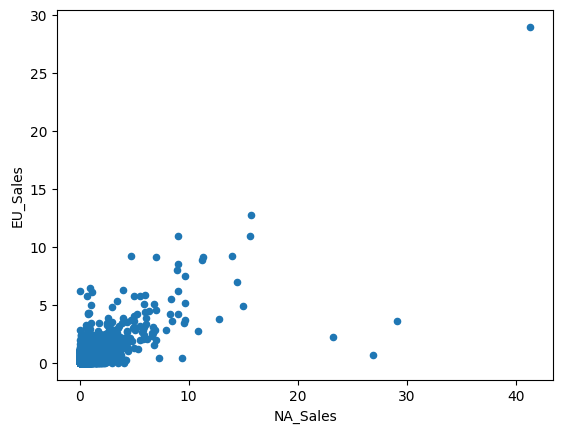

In [180]:
df.plot('NA_Sales', "EU_Sales", kind = "scatter")



Построенная диаграмма демонстрирует, что выборка однозначно является объединением двух нормальных подвыборок.

Построенная диаграмма показывает, что в выборке, скорее всего, есть выбросы. 

Между переменными NA_Sales и EU_Sales существует отрицательная линейная взаимосвязь.

Между переменными NA_Sales и EU_Sales, возможно, существует положительная линейная взаимосвязь.

### Задание C10

<Axes: xlabel='NA_Sales', ylabel='User_Count'>

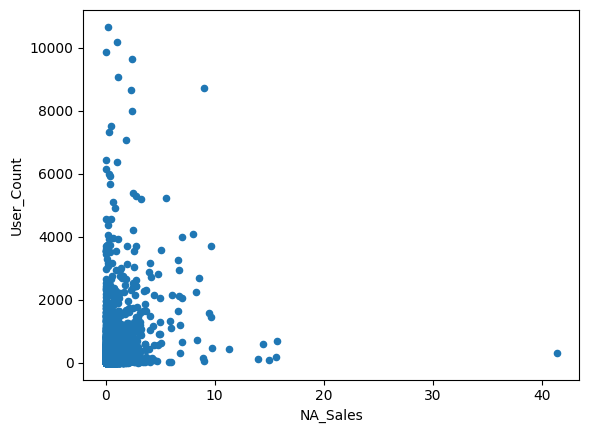

In [181]:
df.plot("NA_Sales", "User_Count", kind = 'scatter')

<Axes: xlabel='Critic_Score', ylabel='User_Count'>

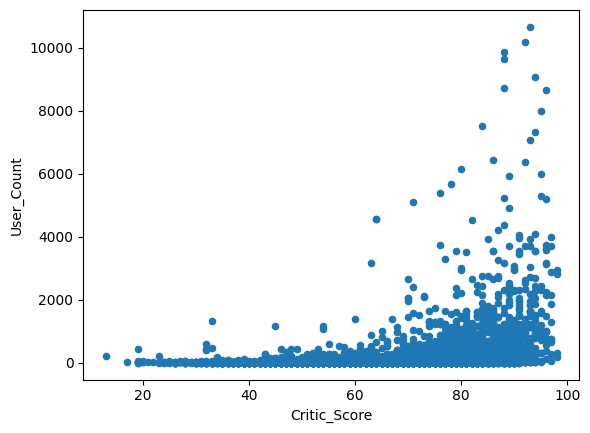

In [182]:
df.plot("Critic_Score", "User_Count", kind = 'scatter')

<Axes: xlabel='Global_Sales', ylabel='NA_Sales'>

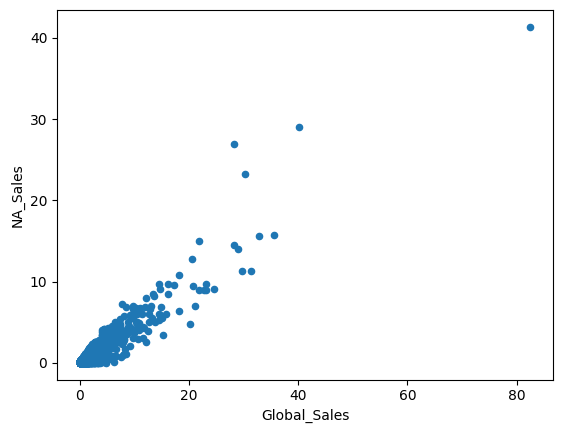

In [183]:
df.plot("Global_Sales", "NA_Sales", kind = 'scatter')

### Задание C11

In [184]:
# df.corr(numeric_only=True)['NA_Sales'].sort_values(ascending=False).abs()[1].round(2)

# "Процесс":

df.corr(numeric_only = True)['NA_Sales'].abs().sort_values(ascending=False)[1].round(2)
# df.corr(numeric_only=True)['NA_Sales'].sort_values()
# df.corr(numeric_only=True)['NA_Sales'].sort_values(ascending=False)
# df.corr(numeric_only=True)['NA_Sales'].abs().sort_values(ascending=False)
# df.corr(numeric_only=True)['NA_Sales'].abs().sort_values(ascending=False)[1]
# df.corr(numeric_only=True)['NA_Sales'].abs().sort_values(ascending=False)[1].round(2)

/var/folders/1c/lnxbjb_177d8cf5hmlxdbv340000gn/T/ipykernel_17886/1819728715.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.corr(numeric_only = True)['NA_Sales'].abs().sort_values(ascending=False)[1].round(2)


0.94

### Задание C12

In [185]:
from sklearn.linear_model import LinearRegression

X = df[['JP_Sales', 'NA_Sales']]

y = df['Global_Sales']
m1 = LinearRegression()
#lr = m1.fit(X, y)


lr = m1.fit(X, y)

In [186]:
print(lr.coef_) # коэффициенты x-ов
print(lr.coef_[1].round(2)) # коэффициент, который мы ищем, округленный до сотых

[1.18876953 1.58764309]
1.59


### Задание C13

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[['NA_Sales', 'JP_Sales',]]
y = df['Other_Sales']
m2 = LinearRegression()
lr = m2.fit(X, y)


y_pred = lr.predict(X)
mean_absolute_error(y, y_pred).round(2)


0.04

In [188]:
df= pd.read_csv('happiness_b.csv')

<Axes: >

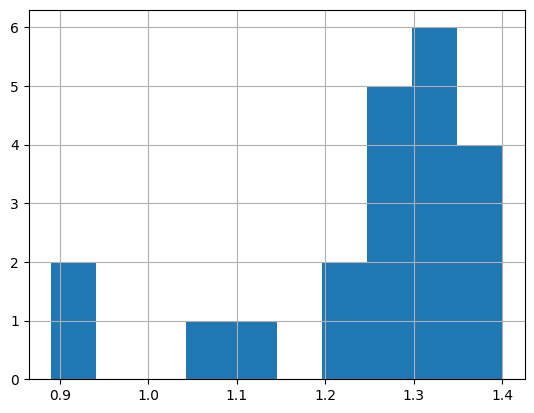

In [189]:
df[df['Region'] == 'Western Europe']['Family'].hist()

<Axes: >

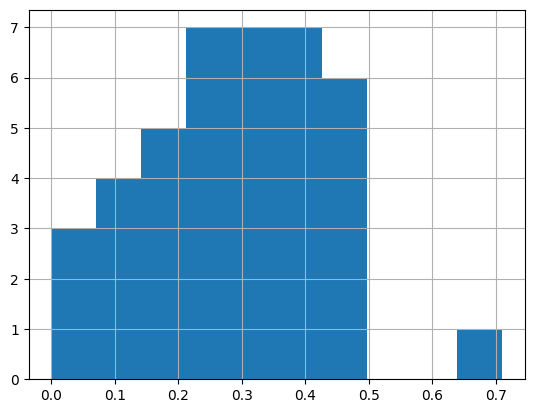

In [190]:
df[df['Region'] == 'Sub-Saharan Africa']['Health'].hist()

In [191]:
iqr = df['Family'].quantile(0.75)-df['Family'].quantile(0.25)
max_q = df['Family'].quantile(0.75)+1.5*iqr
min_l = df['Family'].quantile(0.25)-1.5*iqr


df['Family'].mean()-3*df['Family'].std()


df[(df['Family'] < min_l) | (df['Family'] > max_q)]['Happiness'].mean().round(2)

3.36

Поздравляю! Мы разобрали все задания из НЭ по базовому Анализу данных :)

Всем успехов во время сдачи!